# Dataset


**Bank Marketing:**

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.

The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Attribute information
For more information, read [Moro et al., 2011].

Input variables:

- bank client data:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur", "student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

- related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

- other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

- output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

2 = yes; 1 =  no (I am changing this variable so that 1 simply means subscribed)



### Summary/EDA Observations:
 
 - The Bank phone marketing campaign data set has 45,211 rows and 17 columns including the target or Y variable.
 - The dataset is very clean with no null values found
 - Some key features that may be potentially important:
     - **Age**: Mean age is 41 years. Range is from 18 - 95 , mid 50% quartile is 33-48
         - **Hypothesis**: Those under 30 and greater than 60 may have more money to be able to open a deposit account
     - **Average Balance**: Mean balance is 1.3 K Range is -8k to 102K
         - **Hypothesis**: Those with more average balance will likely have money to open a deposit account
     - **Housing Loan/Personal Loan**: Either of these increases the liability.
         - **Hypothesis**:People with loans may not have enough money to open a deposit account
     - **Education**: People with higher education are likely to be high earners and may have enough spare cash to open a deposit account.
     - **Job**: People in management / technical jobs versus students / entrepreneurs / self-employed may have more money to open a deposit account.  Retired folks may be good candidates as well.
          - Reasons we find interesting: It has the most categories in a feature compared to the other features and it is something we can leverage in focusing on certain jobs or removing ones that do not seem significanto
     - **Marital Status**: Singles may have more money versus married with family responsibilities
     - **Contact**: Cellular seems to be resulting in higher conversion rates
          - **Hypothesis**: Those with cellular phones may have more disposable income or calling someone on a cellular phone yields a better chance of response.
     - **Credit Default**: people with credit default may not be the best candidates to open a deposit accountoPrevious campaigns - may have a role in someone deciding to open a deposit account
 - **Potential Issues**: Call Duration appears to be highly correlated. However, it is unknown till the end of the call. We are unsure if we should keep or drop this variable as it is highly correlated, however we won’t know the result unless a marketing call is accepted.
 - **Potential Outliers**: In the box plot for the feature ‘previous’ (which is the number oftimes the client was contacted before the campaign) has an outlier where there is one client who was contacted 273 times would be a feature; we would want to remove outliers for so that our dataset would not be skewed if we wanted to keep the‘previous’ feature for our data processing.

#### Recommended variables to focus on: 
 - Duration: highly correlated but we are unsure if this is a fair variable to use given it is necessary for a contact to be contacted definitely.  If we find that itis a valuable variable this could be something that we consider to keep the customer on the phone longer as that seems to lead to more successful conversions.
 - Job type is also an interesting variable to us, we see that students and retiredworkers are highly correlated so we would want to further investigate this.  Perhaps the students are more educated and willing to subscribe and the retirees have more disposable income.
 - Marital type is an interesting variable as those that are single seem to be highly correlated, perhaps those that are married will invest in something else like college funds.
 - The type of contact also seems to make a difference, those that had cellular phones were more likely to subscribe and this could be for reasons like those that have cellular phones have more discretionary income or it is easier to contact them.
 - Previous outcome success is also an interesting variable and could be used topinpoint who we make our calls to. If we call those we had previous success with first this might increase our marketing power.

### EDA

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')  # change the default style

In [3]:
# read csv data into pandas dataframe
df = pd.read_csv('projectdataset-1.csv')

In [4]:
# basic shape, data type, null values: dataset looks pretty good.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Class        45211 non-null int64
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


In [5]:
# first 5 lines of data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


In [6]:
# Prepare the data by separating X and y
# dropping Y variable

# axis = 1 below means dropping by columns, 0 means by rows
X = df.drop(['Class'], axis=1)
y = df['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [7]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

#Will revise this later in code after some feature engineering

(36168, 16)
(9043, 16)


In [8]:
# basic stats
X_train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
count,36168.000000,36168,36168,36168,36168,36168.00000,36168,36168,36168,36168.000000,36168,36168.000000,36168.000000,36168.000000,36168.000000,36168
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown
freq,NaN,7830,21771,18561,35521,NaN,20182,30355,23465,NaN,11062,NaN,NaN,NaN,NaN,29589
mean,40.892999,NaN,NaN,NaN,NaN,1365.49342,NaN,NaN,NaN,15.817961,NaN,258.506940,2.763935,40.157238,0.581730,NaN
std,10.627075,NaN,NaN,NaN,NaN,3068.54350,NaN,NaN,NaN,8.331980,NaN,259.142445,3.104161,100.162614,2.408766,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.00000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN
25%,33.000000,NaN,NaN,NaN,NaN,74.00000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN
50%,39.000000,NaN,NaN,NaN,NaN,451.00000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1430.25000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8b80ba390>,
      dtype=object)

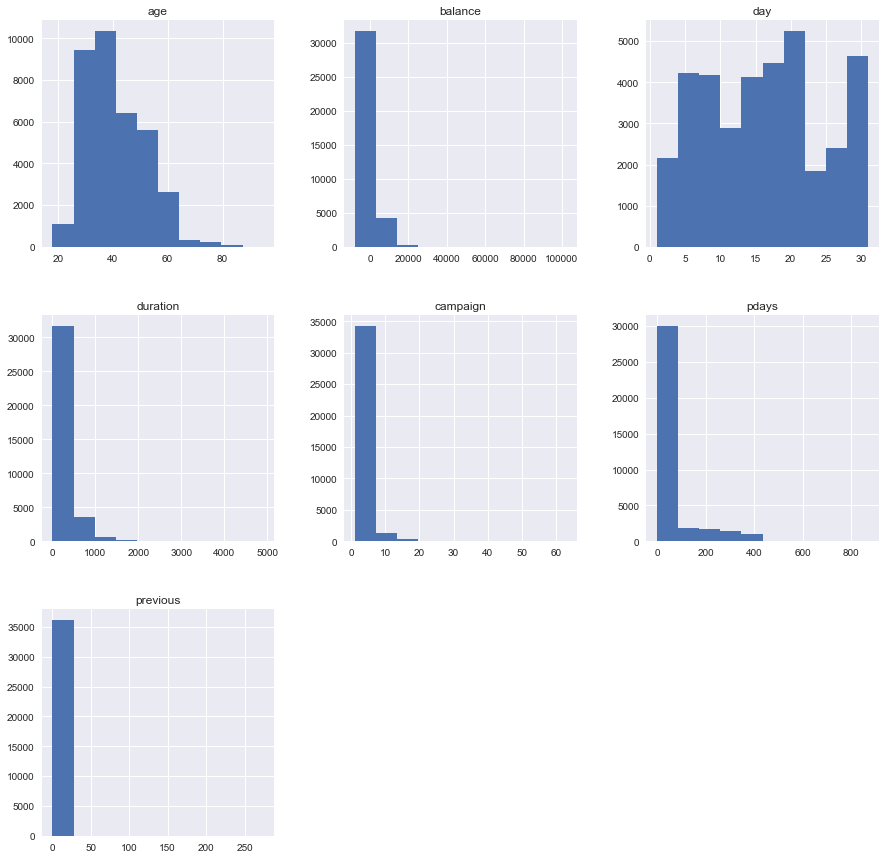

In [9]:
# histograms for all numerical features
X_train.hist(figsize=(15,15))

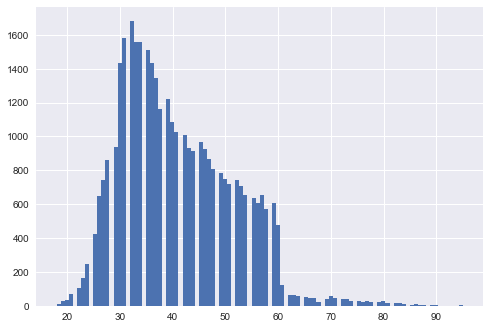

In [10]:
# key findings with potential processing
# long tail (skewed left): log transformation
# some outliers: outlier removal
X_train['age'].hist(bins=100)

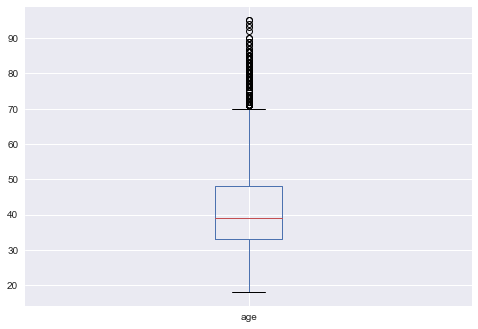

In [11]:
X_train['age'].plot.box()

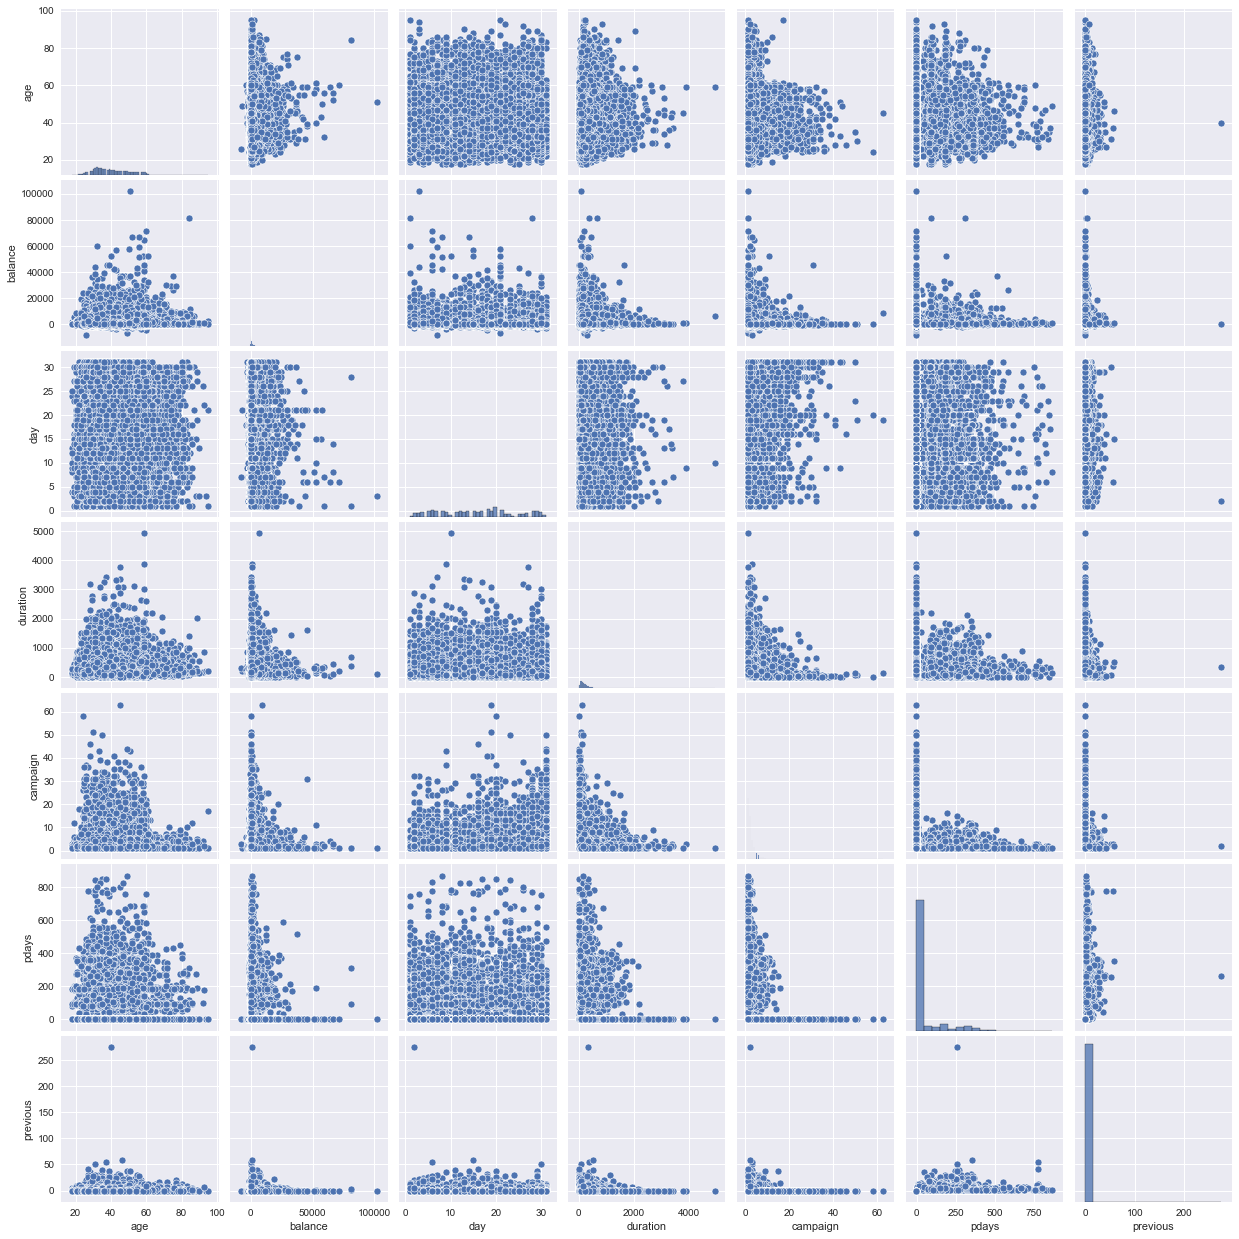

In [12]:
# pairplot example using seaborn
sns.pairplot(data=X_train)

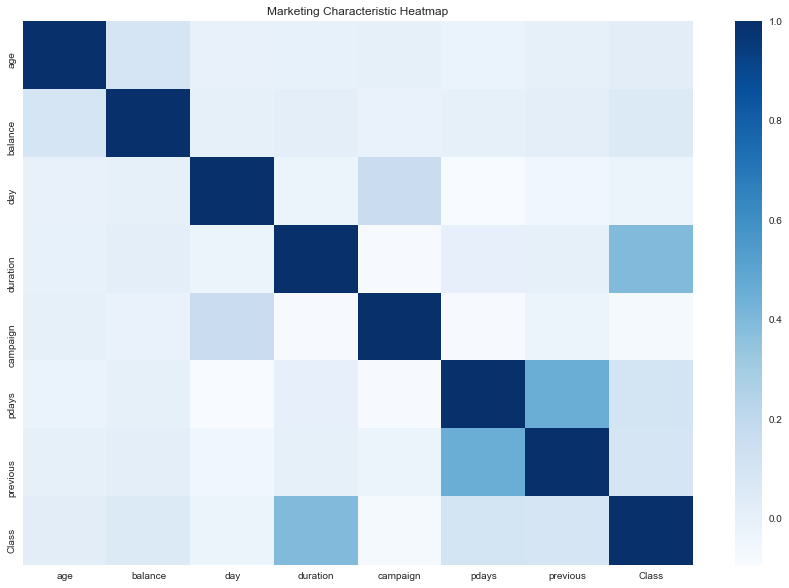

In [13]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Marketing Characteristic Heatmap")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

#For start shows us the duration could be an interesting finding

In [14]:
temp = pd.get_dummies(df.job, drop_first = False, prefix = 'job')
temp.head()

#creating binary output for the types of jobs

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [15]:
temp2 = pd.get_dummies(df.marital, drop_first = False, prefix = 'marital')
temp2.head()

#creating binary output for the marital status

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


In [16]:
temp3 = pd.get_dummies(df.education, drop_first = False, prefix = 'ed')
temp3.head()

#creating binary output for the educational status

,ed_primary,ed_secondary,ed_tertiary,ed_unknown
0,0,0,1,0
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,0,0,1


In [17]:
temp4 = pd.get_dummies(df.contact, drop_first = False, prefix = 'contact')
temp4.head()

#creating binary output for the contact status

,contact_cellular,contact_telephone,contact_unknown
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [18]:
temp5 = pd.get_dummies(df.poutcome, drop_first = False, prefix = 'poutcome')
temp5.head()

#creating binary output for the poutcome (outcome of previous marketing campaign) status

,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [19]:
# Adding back our new male column into df2:
df2 = pd.concat([df, temp,temp2,temp3,temp4,temp5], axis=1)
df2.head()

#concatenating our new columns with original dataset


,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [20]:
df2['default'] = df2.default.eq('yes').mul(1)

#relabeling default to 1s for yes instead of yes/no

In [21]:
df2['housing'] = df2.housing.eq('yes').mul(1)

#relabeling housing loan to 1s for yes instead of yes/no

In [22]:
df2['loan'] = df2.loan.eq('yes').mul(1)

#relabeling personal loan to 1s for yes instead of yes/no

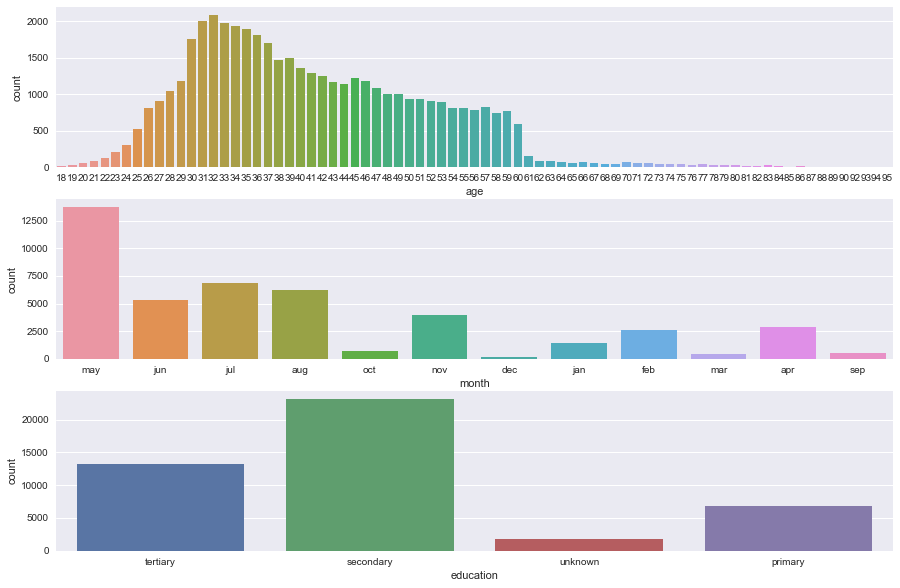

In [23]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))

sns.countplot(x = "age",data = df, ax=axs[0])
sns.countplot(x = "month", data = df, ax=axs[1])
sns.countplot(x = "education", data = df, ax=axs[2])

#We can see a few graphs that show us a little about the distribution.

In [24]:
df2=df2.replace(to_replace="jan",value=1)
df2=df2.replace(to_replace="feb",value=2)
df2=df2.replace(to_replace="mar",value=3)
df2=df2.replace(to_replace="apr",value=4)
df2=df2.replace(to_replace="may",value=5)
df2=df2.replace(to_replace="jun",value=6)
df2=df2.replace(to_replace="jul",value=7)
df2=df2.replace(to_replace="aug",value=8)
df2=df2.replace(to_replace="sep",value=9)
df2=df2.replace(to_replace="oct",value=10)
df2=df2.replace(to_replace="nov",value=11)
df2=df2.replace(to_replace="dec",value=12)

#Replacing months to numbers to make easier to deal with.


In [25]:
df2.Class = df2.Class.replace(1, 0)

#Updating class to 0 and 1s

In [26]:
df2.Class = df2.Class.replace(2, 1)

#Updating class to 0 and 1s

In [27]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,1,0,0,0,1,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,1,0,0,0,0,1,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,1,0,0,0,0,1,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,1,0,0,1,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,1,0,0,0,1


In [28]:
# basic stats
df2.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,...,ed_secondary,ed_tertiary,ed_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
count,45211.000000,45211,45211,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
unique,NaN,12,3,4,NaN,NaN,NaN,NaN,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,blue-collar,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,9732,27214,23202,NaN,NaN,NaN,NaN,29285,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.936210,NaN,NaN,NaN,0.018027,1362.272058,0.555838,0.160226,NaN,15.806419,...,0.513194,0.294198,0.041074,0.647741,0.064276,0.287983,0.108403,0.040698,0.033421,0.817478
std,10.618762,NaN,NaN,NaN,0.133049,3044.765829,0.496878,0.366820,NaN,8.322476,...,0.499831,0.455687,0.198464,0.477680,0.245247,0.452828,0.310892,0.197592,0.179735,0.386278
min,18.000000,NaN,NaN,NaN,0.000000,-8019.000000,0.000000,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,NaN,NaN,NaN,0.000000,72.000000,0.000000,0.000000,NaN,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,NaN,NaN,NaN,0.000000,448.000000,1.000000,0.000000,NaN,16.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,48.000000,NaN,NaN,NaN,0.000000,1428.000000,1.000000,0.000000,NaN,21.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000


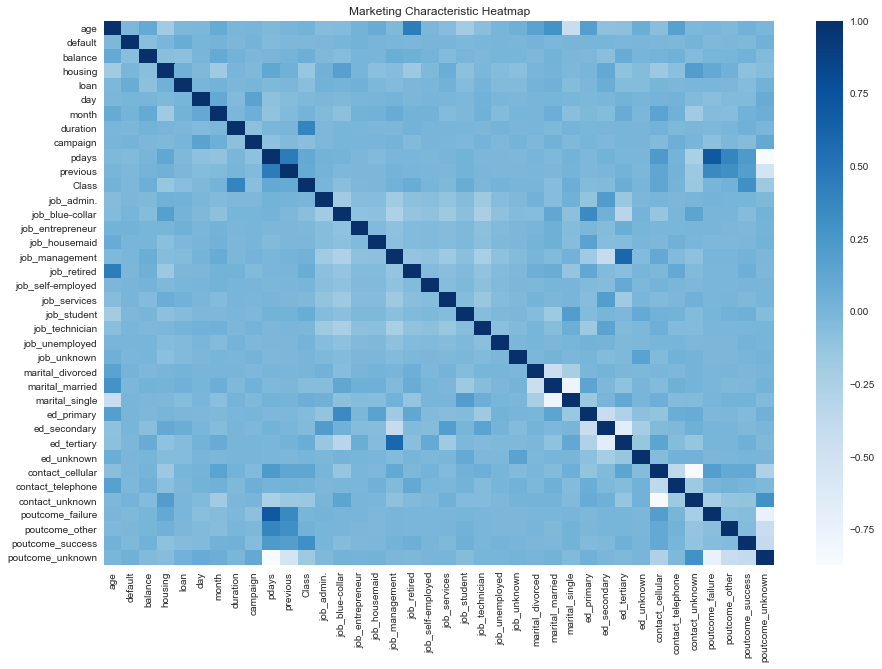

In [29]:
plt.subplots(figsize=(15,10))
ax = plt.axes()
ax.set_title("Marketing Characteristic Heatmap")
corr = df2.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           cmap="Blues")
plt.show()

#redoing correlation matrix with engineered 

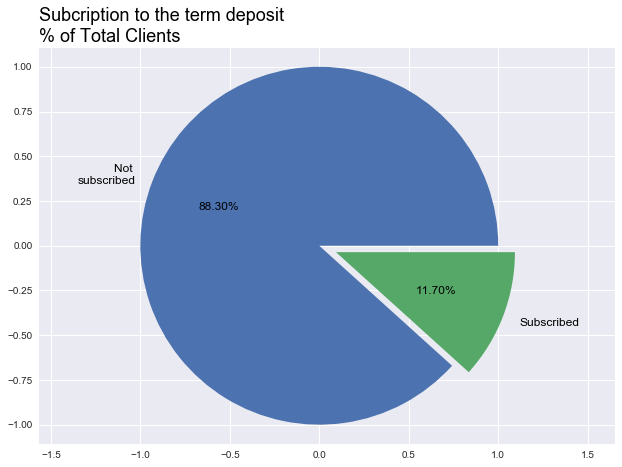

In [30]:
# Pie chart
labels = ["Not \nsubscribed", "Subscribed"]
explode = (0, 0.1)  # only "explode" the second slice (i.e. 'Subscribed')

# depicting the visualization 
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 

ax.pie(df2['Class'].value_counts(), 
       labels = labels,
       explode = explode,
       autopct ='%1.2f%%',
       frame = True,
       textprops = dict(color ="black", size=12)) 

ax.axis('equal') 
plt.title('Subcription to the term deposit\n% of Total Clients',
     loc='left',
     color = 'black', 
     fontsize = '18')

plt.show()

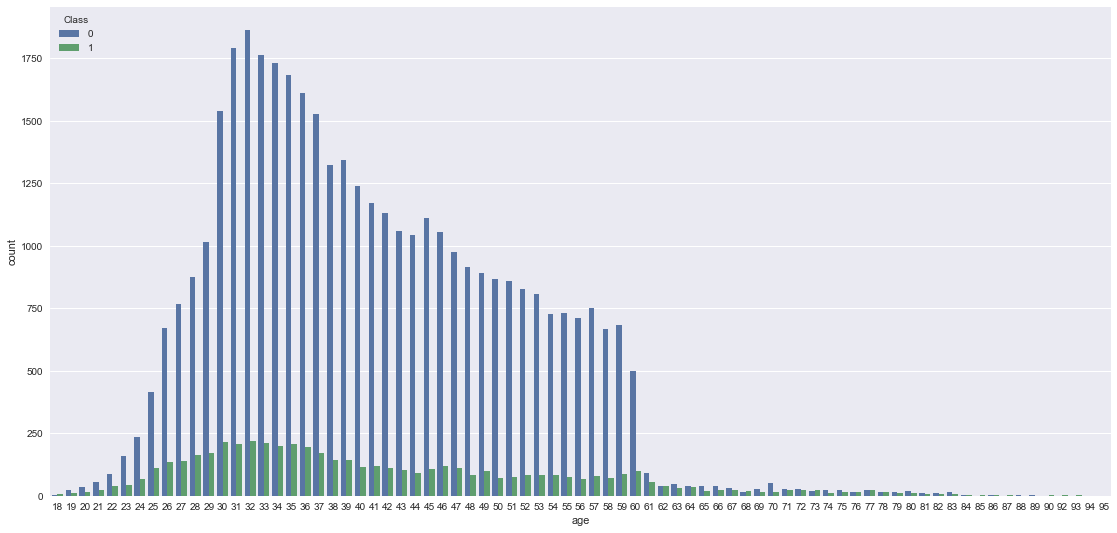

In [33]:
plt.figure(figsize=(19, 9))
sns.countplot(data=df2, x='age', hue='Class')

In [38]:
df2.groupby(["Class"]).mean().transpose() # transpose makes the output easier to read

Class,0,1
age,40.838986,41.670070
default,0.019112,0.009832
balance,1303.714969,1804.267915
housing,0.581008,0.365854
loan,0.169330,0.091511
day,15.892290,15.158253
month,6.128250,6.268482
duration,221.182806,537.294574
campaign,2.846350,2.141047
pdays,36.421372,68.702968


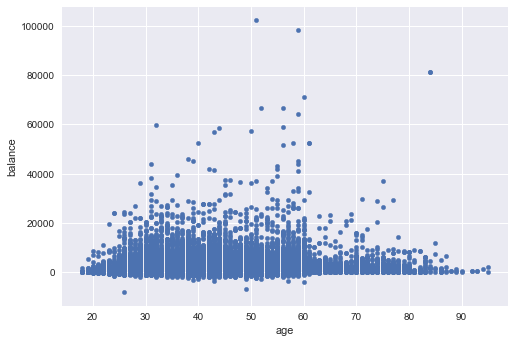

In [39]:
df2.plot(kind = 'scatter', x='age',y='balance')

In [40]:
# basic stats
df2.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,NaN,NaN,NaN,0.0180266,0.133049,0,0,0,0,1
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,NaN,NaN,NaN,0.555838,0.496878,0,0,1,1,1
loan,45211,NaN,NaN,NaN,0.160226,0.36682,0,0,0,0,1
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


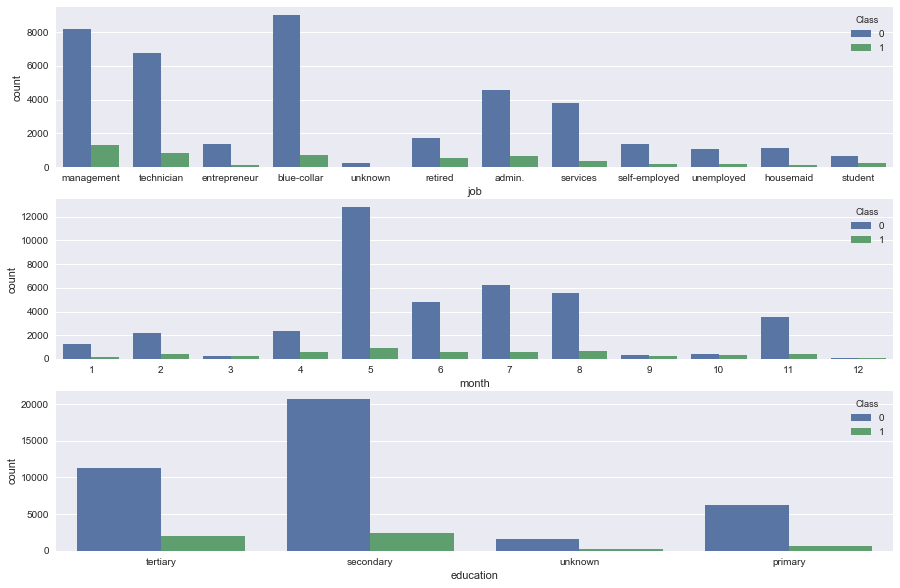

In [60]:
fig, axs = plt.subplots(nrows = 3, ncols = 1, figsize = (15, 10))

sns.countplot(x = "job",data = df2, ax=axs[0],hue="Class")
sns.countplot(x = "month", data = df2, ax=axs[1],hue="Class")
sns.countplot(x = "education", data = df2, ax=axs[2],hue="Class")

In [41]:
# Prepare the data by separating X and y

# axis = 1 below means dropping by columns, 0 means by rows
X = df2.drop(['Class'], axis=1)
y = df2['Class']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 42 columns):
age                  45211 non-null int64
job                  45211 non-null object
marital              45211 non-null object
education            45211 non-null object
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
contact              45211 non-null object
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
poutcome             45211 non-null object
job_admin.           45211 non-null int64
job_blue-collar      45211 non-null int64
job_entrepreneur     45211 non-null int64
job_housemaid        45211 non-null int64
job_management       45211 non-null int64
job_

### Baseline Prediction

In [55]:
# Split the data into a training set and a test set. 
# Any number for the random_state is fine, see 42: https://en.wikipedia.org/wiki/42_(number) 
# We choose to use 20% (test_size=0.2) of the data set as the test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

##added stratify option above



(36168, 3)
(9043, 3)
(36168,)


In [56]:
# Define what I will be using in my Decision Tree
y = y_train
X = X_train[['duration','poutcome_success','contact_cellular']]

In [57]:
from sklearn import tree
# Do a decision tree 
db_tree = tree.DecisionTreeClassifier(max_depth=4, random_state = 0)
db_tree = db_tree.fit(X, y)

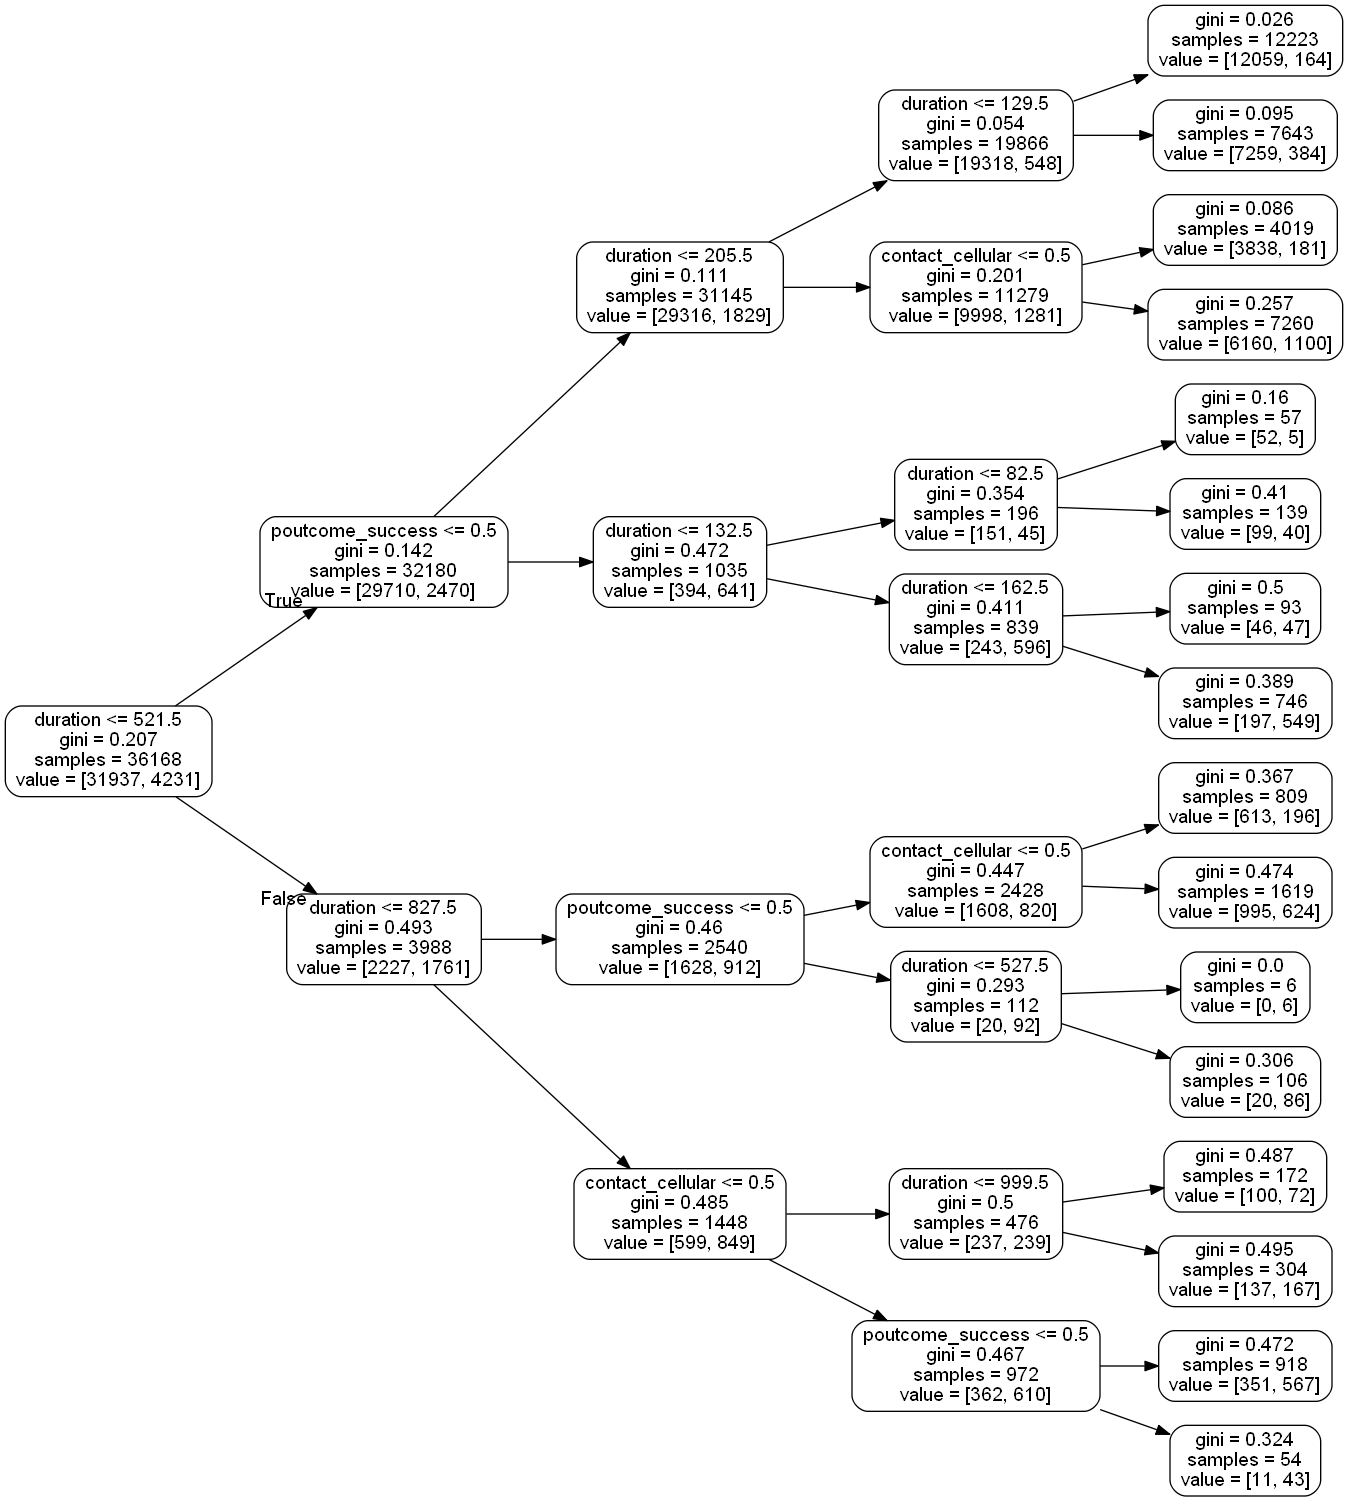

In [58]:
import graphviz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(db_tree, out_file=dot_data,  
        feature_names=X.columns, rounded=True, rotate=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [59]:
# How accurate is my model?
accuracy = db_tree.score(X,y) 
print("Your decision tree is {:.2f}% accurate.".format(accuracy*100))

Your decision tree is 90.25% accurate.


We chose accuracy as our evaluation metric and based on our initial run we have a high percentage. These initial findings appear to be highly accurate however we believe this is driven by the duration predictor, which we have not decided yet to include. We plan to use this accuracy metric as our baseline to compare to other models going forward.

In [ ]:
#This is a test pipeline to try different hyperparamters.

'''from sklearn.model_selection import GridSearchCV

param_grid_dt = [
    {
        'preprocessor__num_pipeline__num_imputer__strategy': ['mean', 'median'],
        'clf_dt__criterion': ['gini', 'entropy'], 
        'clf_dt__max_depth': [3, 4, 5, 6, 7],
    }
]

# set up the grid search 
grid_search_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=10, scoring='accuracy')

# train the model using the full pipeline
grid_search_dt.fit(X_train, y_train)


# test score for the 20 decision tree models
grid_search_dt.cv_results_['mean_test_score']

# best decistion tree model test score
grid_search_dt.best_score_'''

### Models

In [1]:
# placeholder section for models

#### XG Boost

#### Decision Tree/Random Forest

#### Logistic Regression

#### KNN

#### SVM

#### Naive Bayes

In [5]:
NBdf = df
NBdf.Class.replace((1, 2), ('no', 'yes'), inplace=True)
NBdf.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Features to focus on
* duration - numerical
* job - categorical
* martial - categorical
* contact - categorical
* poutcome - categorical

In [6]:
categorical = [var for var in NBdf.columns if NBdf[var].dtype=='O']

In [7]:
categorical

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Class']

In [8]:
numerical = [var for var in NBdf.columns if NBdf[var].dtype!='O']

In [9]:
numerical

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
X = NBdf
X = X.drop(['education', 'default', 'housing', 'loan', 'month', 'Class','age', 'balance', 'day','campaign', 'pdays', 'previous'],axis = 1)
X.columns

Index(['job', 'marital', 'contact', 'duration', 'poutcome'], dtype='object')

In [11]:
y = NBdf['Class']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [19]:
import category_encoders as ce

oneHot = ce.OneHotEncoder(cols=X.columns)
X_train = oneHot.fit_transform(X_train)
X_test = oneHot.transform(X_test)

In [20]:
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()
bayes.fit(X_train, y_train)

GaussianNB()

In [21]:
y_pred = bayes.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score

print('Model Accuracy Score is {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy score: 0.8546


In [24]:
print('Training-set Accuracy Score is {0:0.4f}'. format(accuracy_score(y_train, bayes.predict(X_train))))

Training-set Accuracy Score is 0.8811


In [27]:
y_test.value_counts()

no     9950
yes    1353
Name: Class, dtype: int64